In [1]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.animation import FuncAnimation
sns.set_style('whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv(r'C:\Users\mugok\Desktop\Data sets\fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [3]:
#fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [8]:
#Define the loss and optimizer
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)


In [9]:
history = model.fit(
    X,
    y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 3s 15ms/step - loss: 2.5381
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 0.8639
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5502
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3230
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 0.2258
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1721
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.1381
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - loss: 0.1153
Epoch 9/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1002
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0913
Epoch 11/200
9/9 [==============================] - 0s 7ms/step - loss: 0.0820
Epoch 12/200
9/9 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 13/200
9/9 [==============================] - 0s 8ms/s

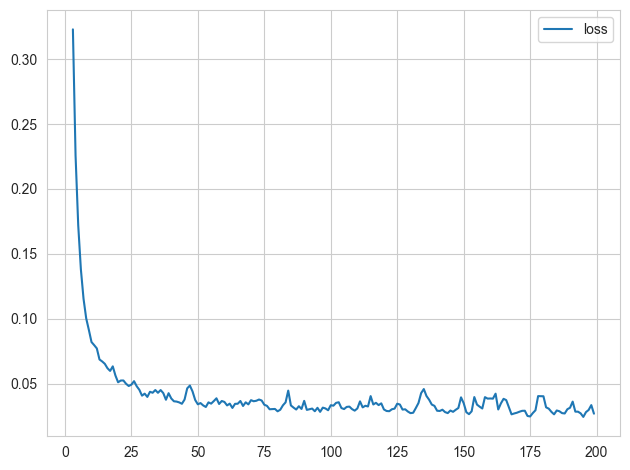

In [12]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 3. 
history_df.loc[3:, ['loss']].plot();